## Diversity & Inclusion

***

## Project Description

Human Resources at our telecom client is highly into diversity and inclusion. They’ve been working hard to improve gender balance at the executive management level, but they’re not seeing any progress. They’re reaching out to us for help.

At PwC Switzerland we are often approached by clients seeking support with diversity and inclusion. Companies need a workforce of diverse talents and backgrounds to succeed in an increasingly complex and heterogeneous world. To us, diversity and inclusion are business imperatives, not just nice-to-haves. We aim for all of our teams to feel welcome and appreciated. But actually achieving this and unlocking its potential involves a whole set of practical challenges.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Diversity-Inclusion-Dataset.csv")

In [3]:
df.head()

Employee ID  Gender Job Level after FY20 promotions New hire FY20?  FY20 Performance Rating Promotion in FY21? In base group for Promotion FY21  Target hire balance FY20 leaver? In base group for turnover FY20 Department @01.07.2020 Leaver FY Job Level after FY21 promotions Last Department in FY20  FTE group  Time type Department & JL group PRA status           Department & JL group for PRA Job Level group PRA status Job Level group for PRA  Time in Job Level @01.07.2020 Job Level before FY20 promotions Promotion in FY20?  FY19 Performance Rating Age group  Age @01.07.2020 Nationality 1 Region group: nationality 1 Broad region group: nationality 1 Last hire date  Years since last hire  Rand
0            1    Male              6 - Junior Officer              N                     2.00                 No                               No                 0.50          Yes                               Y             Operations      FY20                             NaN              Operations  Full Time  Full Time                              NaN                                     NaN                        NaN                     NaN                              3               6 - Junior Officer                  N                     3.00  30 to 39               37         Spain                      Europe                            Europe       1/4/2017                      3  0.77
1            2  Female                     4 - Manager              N                     3.00                 No                              Yes                 0.50           No                               Y      Sales & Marketing       NaN                     4 - Manager       Sales & Marketing  Full Time  Full Time             Uneven - Men benefit         4 - Manager & Sales & Marketing                       Even             4 - Manager                              3                      4 - Manager                  N                      NaN  30 to 39               37       Germany                      Europe                            Europe       1/4/2017                      3  0.14
2            3    Male                    2 - Director              N                     2.00                 No                              Yes                 0.50           No                               Y               Strategy       NaN                    2 - Director                Strategy  Full Time  Full Time                     Inconclusive                 2 - Director & Strategy       Uneven - Men benefit            2 - Director                              3                     2 - Director                  N                     3.00  30 to 39               35   Switzerland                 Switzerland                       Switzerland       1/4/2015                      5  0.48
3            4    Male                     4 - Manager              N                     3.00                 No                              Yes                 0.50           No                               Y                     HR       NaN                     4 - Manager                      HR  Full Time  Full Time                     Inconclusive                        4 - Manager & HR                       Even             4 - Manager                              3                      4 - Manager                  N                     3.00  30 to 39               32       Germany                      Europe                            Europe       1/4/2012                      8  0.52
4            5  Female              6 - Junior Officer              N                     2.00                 No                              Yes                 0.50           No                               Y      Sales & Marketing       NaN              6 - Junior Officer       Sales & Marketing  Full Time  Full Time                             Even  6 - Junior Officer & Sales & Marketing                       Even      6 - Junior Officer                              1          

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Employee ID                        500 non-null    int64  
 1   Gender                             500 non-null    object 
 2   Job Level after FY20 promotions    500 non-null    object 
 3   New hire FY20?                     500 non-null    object 
 4   FY20 Performance Rating            413 non-null    float64
 5   Promotion in FY21?                 500 non-null    object 
 6   In base group for Promotion FY21   500 non-null    object 
 7   Target hire balance                500 non-null    float64
 8   FY20 leaver?                       500 non-null    object 
 9   In base group for turnover FY20    500 non-null    object 
 10  Department @01.07.2020             500 non-null    object 
 11  Leaver FY                          47 non-null     object 

In [5]:
df.describe()

Employee ID  FY20 Performance Rating  Target hire balance  Time in Job Level @01.07.2020  FY19 Performance Rating  Age @01.07.2020  Years since last hire   Rand
count       500.00                   413.00               500.00                         500.00                   386.00           500.00                 500.00 500.00
mean        250.50                     2.41                 0.50                           2.35                     2.57            31.97                   3.86   0.50
std         144.48                     0.65                 0.00                           1.50                     0.65             8.32                   2.77   0.28
min           1.00                     1.00                 0.50                           0.00                     1.00            19.00                   0.00   0.00
25%         125.75                     2.00                 0.50                           1.00                     2.00            25.00                   2.00   0.25
50%         250.50                     2.00                 0.50                           2.00                     3.00            31.00                   3.00   0.51
75%         375.25                     3.00                 0.50                           3.00                     3.00            38.00                   6.00   0.74
max         500.00                     4.00                 0.50                           9.00                     4.00            62.00                   9.00   1.00

In [6]:
df.columns

Index(['Employee ID', 'Gender', 'Job Level after FY20 promotions', 'New hire FY20?', 'FY20 Performance Rating', 'Promotion in FY21?', 'In base group for Promotion FY21', 'Target hire balance', 'FY20 leaver?', 'In base group for turnover FY20', 'Department @01.07.2020', 'Leaver FY', 'Job Level after FY21 promotions', 'Last Department in FY20', 'FTE group', 'Time type', 'Department & JL group PRA status', 'Department & JL group for PRA', 'Job Level group PRA status', 'Job Level group for PRA', 'Time in Job Level @01.07.2020', 'Job Level before FY20 promotions', 'Promotion in FY20?', 'FY19 Performance Rating', 'Age group', 'Age @01.07.2020', 'Nationality 1', 'Region group: nationality 1', 'Broad region group: nationality 1', 'Last hire date', 'Years since last hire', 'Rand'], dtype='object')

### Groupby Function

In [7]:
df.groupby("Gender").mean()

Employee ID  FY20 Performance Rating  Target hire balance  Time in Job Level @01.07.2020  FY19 Performance Rating  Age @01.07.2020  Years since last hire  Rand
Gender                                                                                                                                                                 
Female       255.60                     2.42                 0.50                           2.22                     2.56            31.32                   3.38  0.49
Male         246.96                     2.41                 0.50                           2.44                     2.58            32.42                   4.20  0.51

### Pandas-Profiling Reports

In [8]:
profile = ProfileReport(df=df, title='Diversity Report', minimal=False)

In [9]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/45 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#profile.to_file("your_report.html")

### Drop unwanted features

In [11]:
df.columns

Index(['Employee ID', 'Gender', 'Job Level after FY20 promotions', 'New hire FY20?', 'FY20 Performance Rating', 'Promotion in FY21?', 'In base group for Promotion FY21', 'Target hire balance', 'FY20 leaver?', 'In base group for turnover FY20', 'Department @01.07.2020', 'Leaver FY', 'Job Level after FY21 promotions', 'Last Department in FY20', 'FTE group', 'Time type', 'Department & JL group PRA status', 'Department & JL group for PRA', 'Job Level group PRA status', 'Job Level group for PRA', 'Time in Job Level @01.07.2020', 'Job Level before FY20 promotions', 'Promotion in FY20?', 'FY19 Performance Rating', 'Age group', 'Age @01.07.2020', 'Nationality 1', 'Region group: nationality 1', 'Broad region group: nationality 1', 'Last hire date', 'Years since last hire', 'Rand'], dtype='object')

In [12]:
df.head(3)

Employee ID  Gender Job Level after FY20 promotions New hire FY20?  FY20 Performance Rating Promotion in FY21? In base group for Promotion FY21  Target hire balance FY20 leaver? In base group for turnover FY20 Department @01.07.2020 Leaver FY Job Level after FY21 promotions Last Department in FY20  FTE group  Time type Department & JL group PRA status    Department & JL group for PRA Job Level group PRA status Job Level group for PRA  Time in Job Level @01.07.2020 Job Level before FY20 promotions Promotion in FY20?  FY19 Performance Rating Age group  Age @01.07.2020 Nationality 1 Region group: nationality 1 Broad region group: nationality 1 Last hire date  Years since last hire  Rand
0            1    Male              6 - Junior Officer              N                     2.00                 No                               No                 0.50          Yes                               Y             Operations      FY20                             NaN              Operations  Full Time  Full Time                              NaN                              NaN                        NaN                     NaN                              3               6 - Junior Officer                  N                     3.00  30 to 39               37         Spain                      Europe                            Europe       1/4/2017                      3  0.77
1            2  Female                     4 - Manager              N                     3.00                 No                              Yes                 0.50           No                               Y      Sales & Marketing       NaN                     4 - Manager       Sales & Marketing  Full Time  Full Time             Uneven - Men benefit  4 - Manager & Sales & Marketing                       Even             4 - Manager                              3                      4 - Manager                  N                      NaN  30 to 39               37       Germany                      Europe                            Europe       1/4/2017                      3  0.14
2            3    Male                    2 - Director              N                     2.00                 No                              Yes                 0.50           No                               Y               Strategy       NaN                    2 - Director                Strategy  Full Time  Full Time                     Inconclusive          2 - Director & Strategy       Uneven - Men benefit            2 - Director                              3                     2 - Director                  N                     3.00  30 to 39               35   Switzerland                 Switzerland                       Switzerland       1/4/2015                      5  0.48

In [13]:
df2 = df[['Gender','Job Level before FY20 promotions','Job Level after FY20 promotions','Job Level after FY21 promotions', 'Last Department in FY20',
        'Age @01.07.2020', 'Nationality 1','Years since last hire']]

In [14]:
df2

Gender Job Level before FY20 promotions Job Level after FY20 promotions Job Level after FY21 promotions Last Department in FY20  Age @01.07.2020   Nationality 1  Years since last hire
0      Male               6 - Junior Officer              6 - Junior Officer                             NaN              Operations               37           Spain                      3
1    Female                      4 - Manager                     4 - Manager                     4 - Manager       Sales & Marketing               37         Germany                      3
2      Male                     2 - Director                    2 - Director                    2 - Director                Strategy               35     Switzerland                      5
3      Male                      4 - Manager                     4 - Manager                     4 - Manager                      HR               32         Germany                      8
4    Female               6 - Junior Officer              6 - Junior Officer              6 - Junior Officer       Sales & Marketing               28     Switzerland                      1
5    Female                              NaN                     4 - Manager                     4 - Manager       Internal Services               42           Italy                      0
6      Male                              NaN              3 - Senior Manager              3 - Senior Manager              Operations               35           Italy                      0
7    Female               5 - Senior Officer              5 - Senior Officer              5 - Senior Officer                      HR               34     Switzerland                      7
8    Female               6 - Junior Officer              6 - Junior Officer              6 - Junior Officer       Sales & Marketing               26   United States                      1
9      Male               6 - Junior Officer              6 - Junior Officer              6 - Junior Officer       Internal Services               24     Switzerland                      2
10     Male                      4 - Manager                     4 - Manager                     4 - Manager              Operations               34     Switzerland                      9
11   Female               6 - Junior Officer              6 - Junior Officer              5 - Senior Officer                Strategy               34          France                      3
12     Male               5 - Senior Officer              5 - Senior Officer              5 - Senior Officer              Operations               29         Germany                      5
13     Male               6 - Junior Officer              6 - Junior Officer              6 - Junior Officer              Operations               20     Switzerland                      3
14     Male               6 - Junior Officer              6 - Junior Officer                             NaN       Internal Services               28          France                      1
15     Male                      4 - Manager                     4 - Manager                     4 - Manager                Strategy               34         Germany                      5
16     Male               6 - Junior Officer              6 - Junior Officer              6 - Junior Officer              Operations               24     Switzerland                      2
17   Female               6 - Junior Officer              6 - Junior Officer              5 - Senior Officer       Sales & Marketing               32           Italy                      4
18     Male               5 - Senior Officer              5 - Senior Officer              5 - Senior Officer       Sales & Marketing               30     Switzerland                      3
19   Female               6 - Junior Officer              5 - Senior Officer              5 - Senior Officer              Operations               32         Germany                      8
20     Male               3 - Senior

In [15]:
df2.groupby("Gender").mean()

Age @01.07.2020  Years since last hire
Gender                                        
Female            31.32                   3.38
Male              32.42                   4.20

In [16]:
df2.groupby(["Gender","Job Level before FY20 promotions"])["Years since last hire"].count()

Gender  Job Level before FY20 promotions
Female  1 - Executive                         2
        2 - Director                          4
        3 - Senior Manager                    6
        4 - Manager                          24
        5 - Senior Officer                   35
        6 - Junior Officer                  100
Male    1 - Executive                         8
        2 - Director                         28
        3 - Senior Manager                   35
        4 - Manager                          46
        5 - Senior Officer                   53
        6 - Junior Officer                   93
Name: Years since last hire, dtype: int64

In [17]:
df2.groupby(["Gender","Job Level after FY20 promotions"])["Years since last hire"].count()

Gender  Job Level after FY20 promotions
Female  1 - Executive                        2
        2 - Director                         5
        3 - Senior Manager                  10
        4 - Manager                         30
        5 - Senior Officer                  49
        6 - Junior Officer                 109
Male    1 - Executive                       14
        2 - Director                        32
        3 - Senior Manager                  46
        4 - Manager                         52
        5 - Senior Officer                  56
        6 - Junior Officer                  95
Name: Years since last hire, dtype: int64

In [18]:
df2.groupby(["Gender","Job Level after FY21 promotions"])["Years since last hire"].count()

Gender  Job Level after FY21 promotions
Female  1 - Executive                       3
        2 - Director                        4
        3 - Senior Manager                 11
        4 - Manager                        25
        5 - Senior Officer                 50
        6 - Junior Officer                 91
Male    1 - Executive                      16
        2 - Director                       29
        3 - Senior Manager                 46
        4 - Manager                        54
        5 - Senior Officer                 46
        6 - Junior Officer                 78
Name: Years since last hire, dtype: int64

In [19]:
df2.groupby(["Gender","Last Department in FY20"])["Years since last hire"].count()

Gender  Last Department in FY20
Female  Finance                      6
        HR                          12
        Internal Services           24
        Operations                 100
        Sales & Marketing           59
        Strategy                     4
Male    Finance                     12
        HR                           5
        Internal Services           48
        Operations                 103
        Sales & Marketing          109
        Strategy                    18
Name: Years since last hire, dtype: int64

In [20]:
df2.groupby(["Gender","Age @01.07.2020"])["Years since last hire"].count()

Gender  Age @01.07.2020
Female  19                  2
        20                  1
        22                 20
        23                 11
        24                 13
        25                  8
        26                 15
        27                  9
        28                 19
        29                  7
        30                  7
        31                  9
        32                  6
        33                 11
        34                  7
        35                  2
        36                  4
        37                  3
        38                  5
        39                  5
        40                  6
        41                 10
        42                  4
        43                  3
        44                  4
        45                  4
        46                  1
        47                  2
        48                  1
        49                  2
        50                  1
        51                  2
        56      

In [21]:
df2.groupby(["Gender","Nationality 1"])["Years since last hire"].count()

Gender  Nationality 1 
Female  Austria             4
        Belgium             1
        Denmark             1
        France             36
        Germany            33
        Greece              1
        Israel              1
        Italy              19
        Lebanon             1
        Portugal            1
        Russia              2
        Spain               1
        Sweden              2
        Switzerland        95
        United Kingdom      3
        United States       4
Male    Austria             1
        Canada              1
        China               1
        France             59
        Germany            32
        Italy              13
        Japan               1
        Malaysia            1
        Netherlands         3
        Portugal            1
        Romania             1
        Spain               5
        Switzerland       169
        United Kingdom      5
        United States       2
Name: Years since last hire, dtype: int64

### Treat Missing Values

In [22]:
df2.isnull().sum()

Gender                               0
Job Level before FY20 promotions    66
Job Level after FY20 promotions      0
Job Level after FY21 promotions     47
Last Department in FY20              0
Age @01.07.2020                      0
Nationality 1                        0
Years since last hire                0
dtype: int64

## Data Visualization

### Univariate Data Exploration

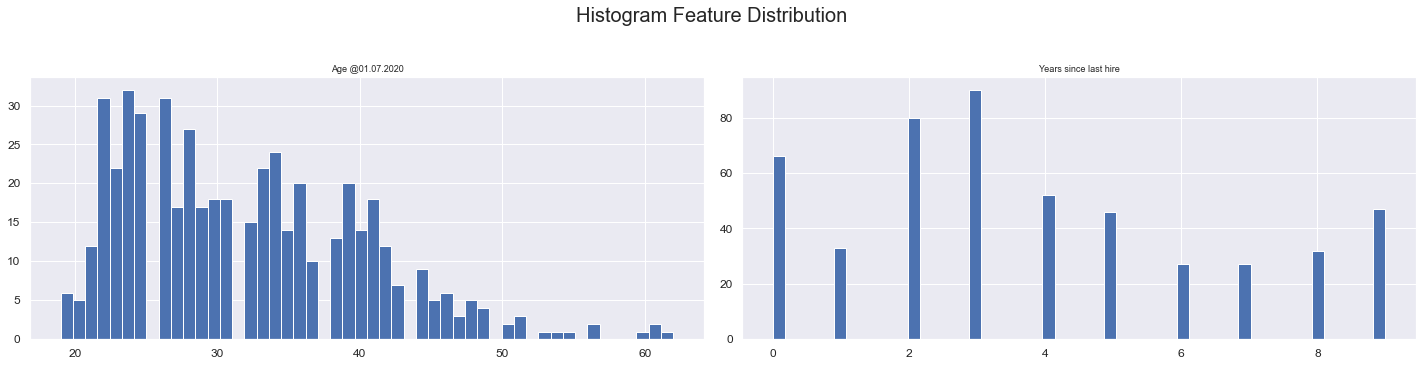

In [23]:
df2.hist(bins=50, figsize=(20,5))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

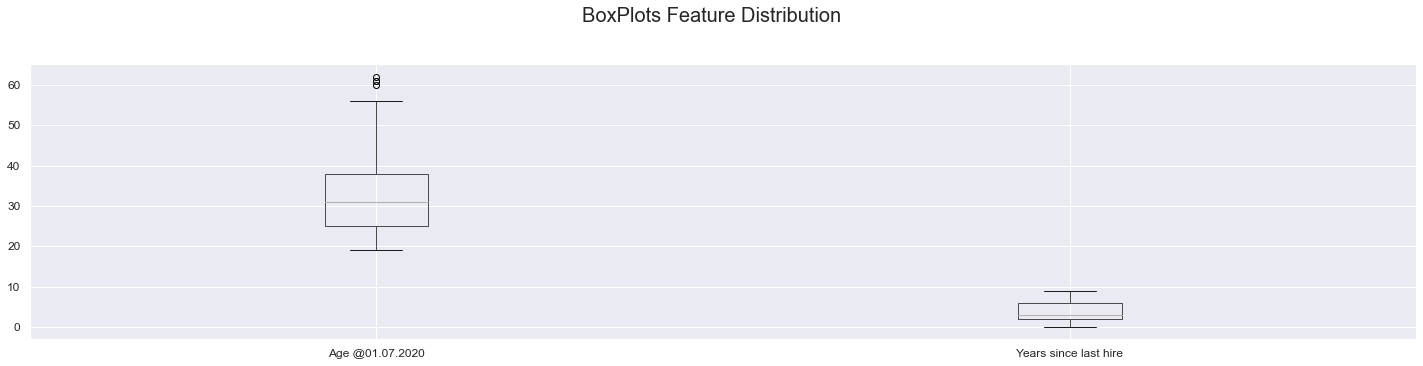

In [24]:
df2.boxplot(figsize=(20,5))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [25]:
fig, ax = plt.subplots(1,3, sharex=False, figsize=(25,5))
fig.suptitle('Staff Promotions')



sns.countplot(x="Job Level before FY20 promotions", data=df, hue=df.Gender, ax=ax[0])
ax[0].set_title('Before promotion 2020')
ax[0].tick_params('x', labelrotation=45)

sns.countplot(x="Job Level after FY20 promotions", data=df, hue=df.Gender, ax=ax[1])
ax[1].set_title('After promotion 2020')
ax[1].tick_params('x', labelrotation=45)

sns.countplot(x="Job Level after FY21 promotions", data=df, hue=df.Gender, ax=ax[2])
ax[2].set_title('After promotion 2021')
ax[2].tick_params('x', labelrotation=45)

plt.show()

In [26]:
df2.columns

Index(['Gender', 'Job Level before FY20 promotions', 'Job Level after FY20 promotions', 'Job Level after FY21 promotions', 'Last Department in FY20', 'Age @01.07.2020', 'Nationality 1', 'Years since last hire'], dtype='object')

In [27]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(30,20))
fig.suptitle('Main Title', y=0.5)

sns.countplot(x="Last Department in FY20", data=df, ax=ax1, hue=df.Gender)
ax1.set_title('Gender by Department', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.countplot(x="Age @01.07.2020", data=df, ax=ax2, hue=df.Gender)
ax2.set_title('Gender by Age', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="Nationality 1", data=df, ax=ax3, hue=df.Gender)
ax3.set_title('Gender by Nationality', size=20)
ax3.tick_params('x', labelrotation=45)


sns.countplot(x="Years since last hire", data=df, ax=ax4, hue=df.Gender)
ax4.set_title('Gender by Years in company', size=20)
#ax4.tick_params('x', labelrotation=45)


plt.show()

### Correlation

In [28]:
df.corr()

Employee ID  FY20 Performance Rating  Target hire balance  Time in Job Level @01.07.2020  FY19 Performance Rating  Age @01.07.2020  Years since last hire  Rand
Employee ID                           1.00                    -0.02                  NaN                          -0.02                    -0.11            -0.00                   0.00  0.10
FY20 Performance Rating              -0.02                     1.00                  NaN                          -0.00                     0.08             0.03                   0.04 -0.01
Target hire balance                    NaN                      NaN                  NaN                            NaN                      NaN              NaN                    NaN   NaN
Time in Job Level @01.07.2020        -0.02                    -0.00                  NaN                           1.00                     0.29             0.14                   0.59  0.08
FY19 Performance Rating              -0.11                     0.08                  NaN                           0.29                     1.00             0.00                  -0.03 -0.03
Age @01.07.2020                      -0.00                     0.03                  NaN                           0.14                     0.00             1.00                   0.38 -0.00
Years since last hire                 0.00                     0.04                  NaN                           0.59                    -0.03             0.38                   1.00  0.09
Rand                                  0.10                    -0.01                  NaN                           0.08                    -0.03            -0.00                   0.09  1.00

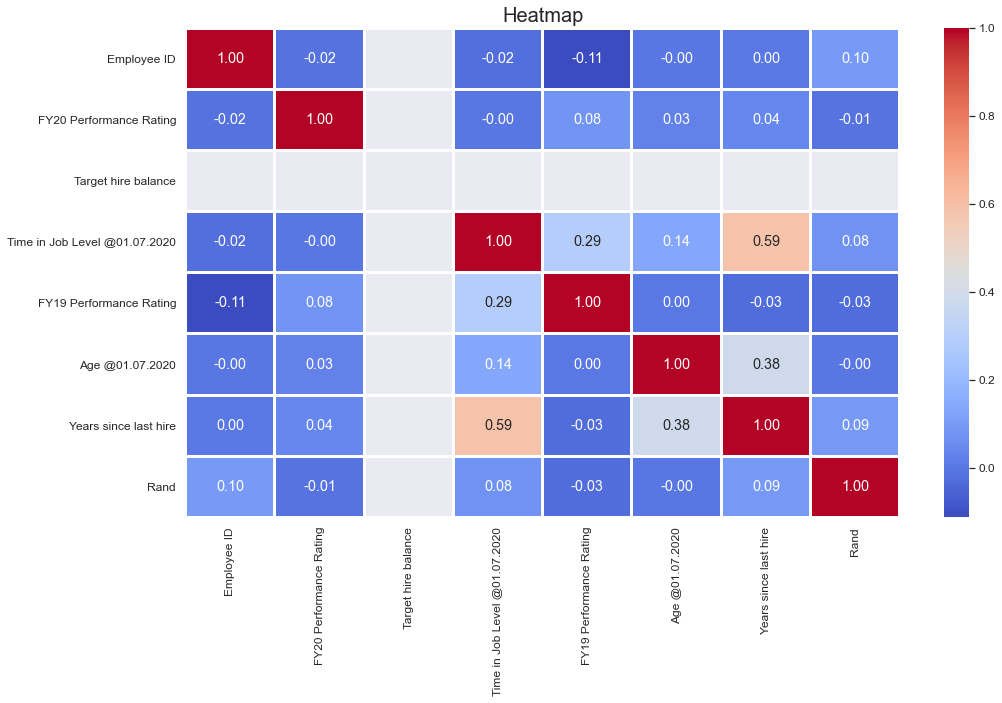

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Heatmap", fontsize=20)
plt.show()

## Data Preprocessing

### Save to CSV

In [30]:
#df2.to_csv("diversityfinal.csv", index=False)

#### Python code done by Dennis Lam